#### Refer https://docs.databricks.com/_static/notebooks/mlflow/mlflow-end-to-end-example.html

In [22]:
import io
import os
import boto3
import pandas as pd
import s3fs

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')


In [23]:
!pip install mlflow

In [24]:
bucket='ca-mlflow-v1'
train_file_key = 'Development/train.tsv'
s3uri = 's3://{}/{}'.format(bucket, train_file_key)


In [25]:
data = pd.read_csv(s3uri,sep='\t')

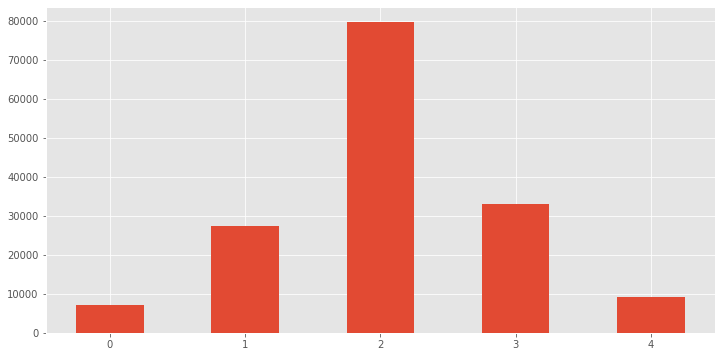

In [26]:
num_unique = len(data['Sentiment'].unique())
data['Sentiment'].hist(figsize=(12,6), bins=np.arange(num_unique+1)-0.5, rwidth=0.5)

## Building Model

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.utils.environment import _mlflow_conda_env

In [28]:
clf = MultinomialNB()
vectorizer = TfidfVectorizer()

In [29]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]
pos_neg['Binary'] = pos_neg.apply(
    lambda x: 0 if x['Sentiment'] == 0 else 1, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
import mlflow
from mlflow.models.signature import infer_signature
from sklearn.metrics import roc_auc_score

tracking_uri="http://ec2-54-221-58-134.compute-1.amazonaws.com:5000"
experiment_name="mlflow_artifacts"
mlflow.set_tracking_uri(tracking_uri)
mlflow.set_experiment(experiment_name)


<Experiment: artifact_location='s3://ml-test-mlflow/mlartifact/2', experiment_id='2', lifecycle_stage='active', name='mlflow_artifacts', tags={}>

In [40]:
with mlflow.start_run():
    mlflow.set_tag("Env", "Development")
    mlflow.set_tag("Run_ID", run.info.run_id)
    
    X_train_tfidf=vectorizer.fit_transform(pos_neg.loc[:, 'Phrase'])
    y = pos_neg.loc[:, 'Binary']
    X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y)

    clf = MultinomialNB().fit(X_train, y_train)
    predictions_test = clf.predict(X_test)
    auc_score = roc_auc_score(y_test, predictions_test)

    clf_path = "./artifacts/Classifier.pkl"
    vectoriser_path = "./artifacts/TFIDFVectorizer.pkl"
    
    with open(clf_path, 'wb') as f:
                pickle.dump(clf, f)
                print("Pickled classifier at {}".format(clf_path))

    with open(vectoriser_path, 'wb') as f:
                pickle.dump(vectorizer, f)
                print("Pickled vectoriser at {}".format(vectoriser_path))

    mlflow.log_artifacts("./artifacts")

Pickled classifier at ./artifacts/Classifier.pkl
Pickled vectoriser at ./artifacts/TFIDFVectorizer.pkl


In [38]:
mlflow.end_run()

In [27]:
artifacts

'artifact'

In [9]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


mlflow==1.25.1
boto3==1.21.34
pandas==1.0.1
s3fs==2022.3.0
numpy==1.21.5


In [ ]:
X_train_tfidf=vectorizer.fit_transform(pos_neg.loc[:, 'Phrase'])
y = pos_neg.loc[:, 'Binary']
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y)

clf = MultinomialNB().fit(X_train, y_train)
predictions_test = clf.predict(X_test)
auc_score = roc_auc_score(y_test, predictions_test)

clf_path = "./artifacts/Classifier.pkl"
vectoriser_path = "./artifacts/TFIDFVectorizer.pkl"

with open(clf_path, 'wb') as f:
            pickle.dump(clf, f)
            print("Pickled classifier at {}".format(clf_path))

with open(vectoriser_path, 'wb') as f:
            pickle.dump(vectorizer, f)
            print("Pickled vectoriser at {}".format(vectoriser_path))